In [3]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris.data
print(x[:10])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [5]:
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
x = x[y!=0, :2]
y = y[y!=0]

In [7]:
print(x,y)

[[ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]
 [ 6.7  3. ]
 [ 6.   2.9]
 [ 5.7  2.6]
 [ 5.5  2.4]
 [ 5.5  2.4]
 [ 5.8  2.7]
 [ 6.   2.7]
 [ 5.4  3. ]
 [ 6.   3.4]
 [ 6.7  3.1]
 [ 6.3  2.3]
 [ 5.6  3. ]
 [ 5.5  2.5]
 [ 5.5  2.6]
 [ 6.1  3. ]
 [ 5.8  2.6]
 [ 5.   2.3]
 [ 5.6  2.7]
 [ 5.7  3. ]
 [ 5.7  2.9]
 [ 6.2  2.9]
 [ 5.1  2.5]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 5.8  2.7]
 [ 7.1  3. ]
 [ 6.3  2.9]
 [ 6.5  3. ]
 [ 7.6  3. ]
 [ 4.9  2.5]
 [ 7.3  2.9]
 [ 6.7  2.5]
 [ 7.2  3.6]
 [ 6.5  3.2]
 [ 6.4  2.7]
 [ 6.8  3. ]
 [ 5.7  2.5]
 [ 5.8  2.8]
 [ 6.4  3.2]
 [ 6.5  3. ]
 [ 7.7  3.8]
 [ 7.7  2.6]
 [ 6.   2.2]
 [ 6.9  3.2]
 [ 5.6  2.8]
 [ 7.7  2.8]
 [ 6.3  2.7]
 [ 6.7  3.3]
 [ 7.2  3.2]
 [ 6.2  2.8]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

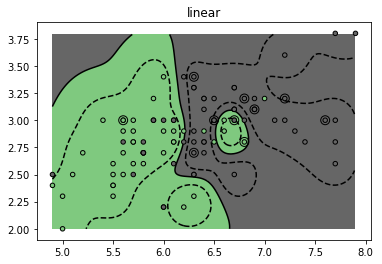

In [19]:
classifier = svm.SVC(kernel="rbf", gamma=15)
classifier.fit(x_train, y_train)
plt.figure()
plt.clf()
plt.scatter(x[:,0], x[:,1], c=y, zorder=10, cmap=plt.cm.Accent, edgecolor = 'k', s=20)
plt.scatter(x_test[:, 0], x_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')
plt.axis('tight')
x_min = x[:,0].min()
x_max = x[:,0].max()
y_min = x[:,1].min()
y_max = x[:,1].max()

x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step=0.01), np.arange(y_min, y_max, step=0.01))

z = classifier.decision_function(np.array([x_grid.ravel(), y_grid.ravel()]).T)
z = z.reshape(x_grid.shape)
plt.pcolormesh(x_grid, y_grid, z>0, cmap=plt.cm.Accent)
plt.contour(x_grid, y_grid, z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.title('linear')
plt.show()